In [78]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet

In [79]:
price_df=pd.read_csv('price.csv')

In [80]:
price_df

,Date,Prices
0,2004-01,833.86
1,2004-02,824.85
2,2004-03,861.94
3,2004-04,956.57
4,2004-05,922.35
...,...,...
127,2014-08,2414.57
128,2014-09,2385.66
129,2014-10,2324.68
130,2014-11,2369.60


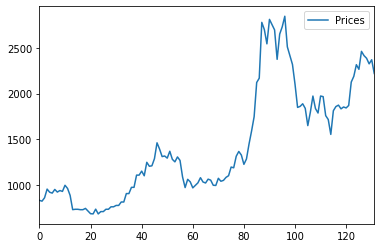

In [81]:
price_df.plot()

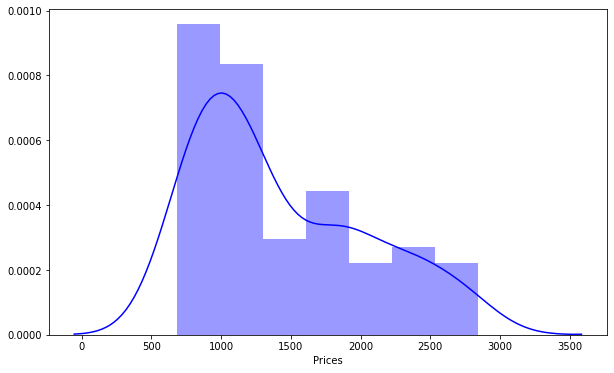

In [82]:
plt.figure(figsize=(10,6))
sns.distplot(price_df['Prices'],color="b")

In [83]:
price_df=price_df.rename(columns={'Date':'ds','Prices':'y'})

In [84]:
price_df

,ds,y
0,2004-01,833.86
1,2004-02,824.85
2,2004-03,861.94
3,2004-04,956.57
4,2004-05,922.35
...,...,...
127,2014-08,2414.57
128,2014-09,2385.66
129,2014-10,2324.68
130,2014-11,2369.60


In [85]:
price_df['ds']=pd.to_datetime(price_df['ds'])

In [86]:
price_df

,ds,y
0,2004-01-01,833.86
1,2004-02-01,824.85
2,2004-03-01,861.94
3,2004-04-01,956.57
4,2004-05-01,922.35
...,...,...
127,2014-08-01,2414.57
128,2014-09-01,2385.66
129,2014-10-01,2324.68
130,2014-11-01,2369.60


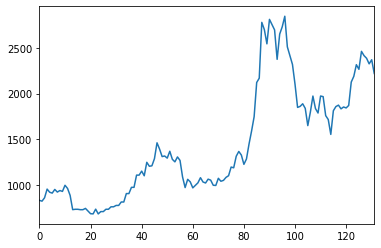

In [87]:
price_df['y'].plot()

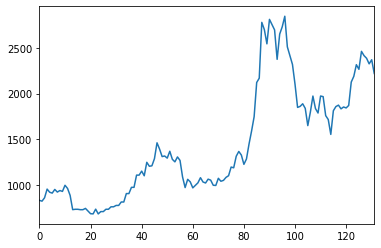

In [88]:
price_df['y'].plot()

In [89]:
m=Prophet()
m.fit(price_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [90]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [91]:
m.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [92]:
m.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [93]:
future=m.make_future_dataframe(periods=365)


In [94]:
future

,ds
0,2004-01-01
1,2004-02-01
2,2004-03-01
3,2004-04-01
4,2004-05-01
...,...
492,2015-11-27
493,2015-11-28
494,2015-11-29
495,2015-11-30


In [95]:
future.tail()

,ds
492,2015-11-27
493,2015-11-28
494,2015-11-29
495,2015-11-30
496,2015-12-01


In [96]:
forecast=m.predict(future)

In [101]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-01-01,585.788727,169.952398,1013.073147,585.788727,585.788727,4.696332,4.696332,4.696332,4.696332,4.696332,4.696332,0.0,0.0,0.0,590.485060
1,2004-02-01,598.918989,165.659302,1050.889207,598.918989,598.918989,-8.372566,-8.372566,-8.372566,-8.372566,-8.372566,-8.372566,0.0,0.0,0.0,590.546423
2,2004-03-01,611.202136,196.439760,1129.394043,611.202136,611.202136,36.587814,36.587814,36.587814,36.587814,36.587814,36.587814,0.0,0.0,0.0,647.789950
3,2004-04-01,624.332397,259.641982,1174.432507,624.332397,624.332397,88.288223,88.288223,88.288223,88.288223,88.288223,88.288223,0.0,0.0,0.0,712.620620
4,2004-05-01,637.039102,232.821018,1117.591662,637.039102,637.039102,24.644542,24.644542,24.644542,24.644542,24.644542,24.644542,0.0,0.0,0.0,661.683644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,2015-11-27,2477.937194,1973.452259,2846.321433,2477.596202,2478.329041,-30.330395,-30.330395,-30.330395,-30.330395,-30.330395,-30.330395,0.0,0.0,0.0,2447.606799
493,2015-11-28,2478.380483,2032.207353,2891.214185,2478.037176,2478.773885,-33.740072,-33.740072,-33.740072,-33.740072,-33.740072,-33.740072,0.0,0.0,0.0,2444.640411
494,2015-11-29,2478.823772,2022.869522,2889.015189,2478.478834,2479.218730,-34.707187,-34.707187,-34.707187,-34.707187,-34.707187,-34.707187,0.0,0.0,0.0,2444.116586
495,2015-11-30,2479.267061,2013.152560,2887.505560,2478.919535,2479.663250,-32.998863,-32.998863,-32.998863,-32.998863,-32.998863,-32.998863,0.0,0.0,0.0,2446.268198


In [102]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
492,2015-11-27,2447.606799,1973.452259,2846.321433
493,2015-11-28,2444.640411,2032.207353,2891.214185
494,2015-11-29,2444.116586,2022.869522,2889.015189
495,2015-11-30,2446.268198,2013.152560,2887.505560
496,2015-12-01,2451.254304,1999.358924,2896.495535


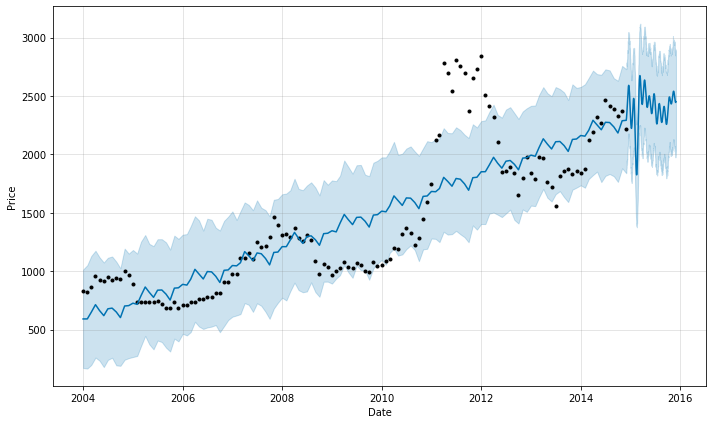

In [103]:
figure=m.plot(forecast,xlabel='Date',ylabel='Price')

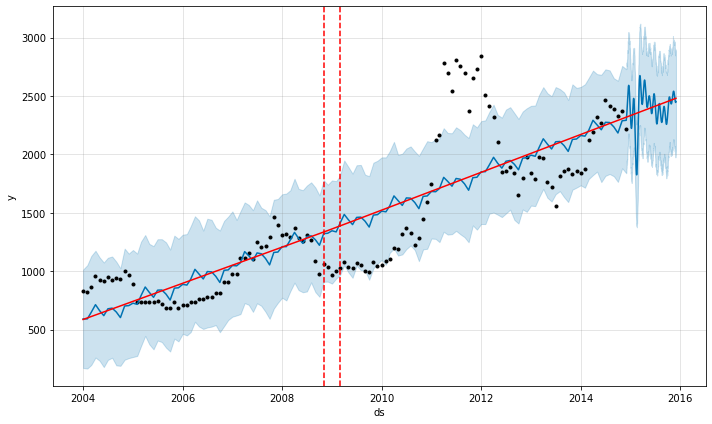

In [104]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


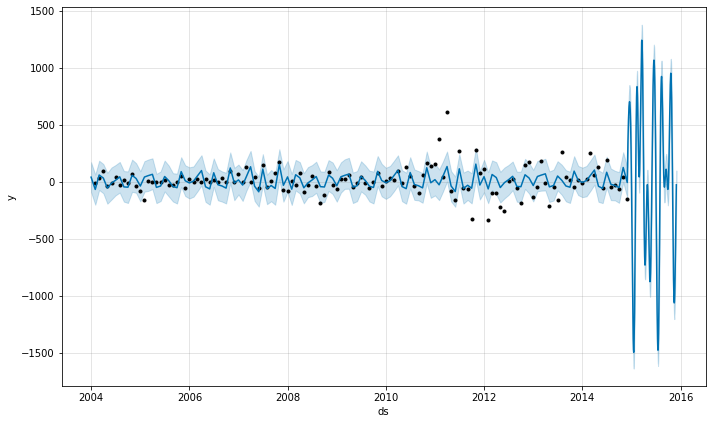

In [132]:
m = Prophet(changepoints=['2008-01-01'])
forecast = m.fit(price_df).predict(future)
fig = m.plot(forecast)

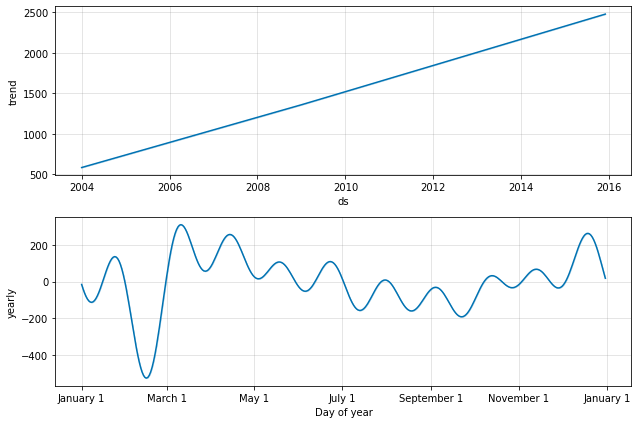

In [105]:
figure2=m.plot_components(forecast)

In [112]:
from fbprophet.diagnostics import cross_validation

In [110]:
prices_df_cv=cross_validation(m,horizon="365 days",period='180 days',initial='1095 days')

INFO:fbprophet:Making 15 forecasts with cutoffs between 2007-01-07 00:00:00 and 2013-12-01 00:00:00


In [113]:
prices_df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2007-02-01,753.395347,696.011564,810.837729,975.88,2007-01-07
1,2007-03-01,898.784230,839.002913,961.416460,1109.34,2007-01-07
2,2007-04-01,814.045425,755.259246,868.927531,1109.34,2007-01-07
3,2007-05-01,863.956259,803.407464,922.189370,1153.15,2007-01-07
4,2007-06-01,871.788128,811.730170,929.614510,1102.27,2007-01-07
...,...,...,...,...,...,...
175,2014-08-01,2250.685813,1766.605102,2726.331798,2414.57,2013-12-01
176,2014-09-01,2211.290710,1729.901010,2652.350783,2385.66,2013-12-01
177,2014-10-01,2159.026837,1681.927176,2617.332932,2324.68,2013-12-01
178,2014-11-01,2270.482622,1813.831043,2739.787016,2369.60,2013-12-01


In [114]:
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(prices_df_cv)

In [115]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,180617.648313,424.991351,336.299586,0.214933,0.184709,0.388889
1,41 days,178706.175391,422.736532,328.719611,0.209644,0.184709,0.444444
2,42 days,170543.124261,412.968672,312.658932,0.191395,0.181079,0.500000
3,46 days,207507.123204,455.529498,348.582259,0.203370,0.184709,0.444444
4,47 days,256593.616899,506.550705,394.053758,0.215618,0.207338,0.388889
...,...,...,...,...,...,...,...
142,359 days,633168.914215,795.719118,655.601341,0.392838,0.357169,0.222222
143,360 days,562978.496339,750.318930,619.416431,0.372096,0.348283,0.222222
144,361 days,485898.578720,697.064257,566.257436,0.344564,0.330076,0.222222
145,362 days,478326.460619,691.611495,549.509534,0.331395,0.330076,0.277778


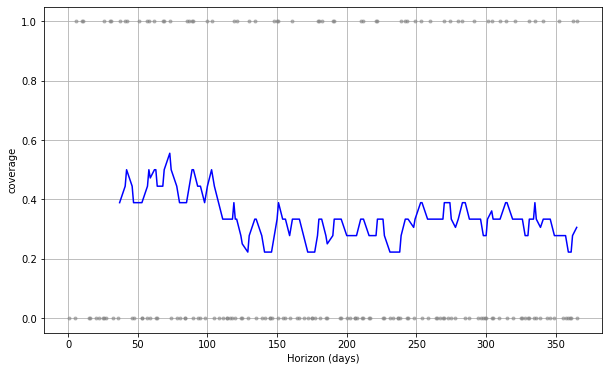

In [116]:
from fbprophet.plot import plot_cross_validation_metric
fig3=plot_cross_validation_metric(prices_df_cv,metric='coverage')

In [117]:
price_df.head()

,ds,y
0,2004-01-01,833.86
1,2004-02-01,824.85
2,2004-03-01,861.94
3,2004-04-01,956.57
4,2004-05-01,922.35


In [118]:
prices_df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2007-02-01,753.395347,696.011564,810.837729,975.88,2007-01-07
1,2007-03-01,898.784230,839.002913,961.416460,1109.34,2007-01-07
2,2007-04-01,814.045425,755.259246,868.927531,1109.34,2007-01-07
3,2007-05-01,863.956259,803.407464,922.189370,1153.15,2007-01-07
4,2007-06-01,871.788128,811.730170,929.614510,1102.27,2007-01-07
...,...,...,...,...,...,...
175,2014-08-01,2250.685813,1766.605102,2726.331798,2414.57,2013-12-01
176,2014-09-01,2211.290710,1729.901010,2652.350783,2385.66,2013-12-01
177,2014-10-01,2159.026837,1681.927176,2617.332932,2324.68,2013-12-01
178,2014-11-01,2270.482622,1813.831043,2739.787016,2369.60,2013-12-01


In [119]:
price_df['y']=price_df['y']-price_df['y'].shift(1)

In [120]:
price_df

,ds,y
0,2004-01-01,NaN
1,2004-02-01,-9.01
2,2004-03-01,37.09
3,2004-04-01,94.63
4,2004-05-01,-34.22
...,...,...
127,2014-08-01,-46.64
128,2014-09-01,-28.91
129,2014-10-01,-60.98
130,2014-11-01,44.92


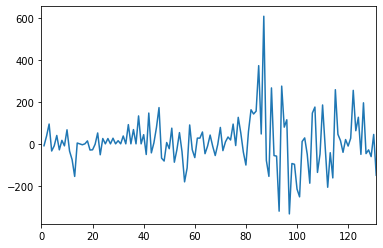

In [121]:
price_df['y'].plot()

In [122]:
m=Prophet()
m.fit(price_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [123]:
future=m.make_future_dataframe(periods=365)


In [124]:
forecast=m.predict(future)

In [125]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-01-01,-1.364832,-145.057628,124.241399,-1.364832,-1.364832,-8.017399,-8.017399,-8.017399,-8.017399,-8.017399,-8.017399,0.0,0.0,0.0,-9.382231
1,2004-02-01,-1.197659,-148.046966,124.811771,-1.197659,-1.197659,-18.389498,-18.389498,-18.389498,-18.389498,-18.389498,-18.389498,0.0,0.0,0.0,-19.587156
2,2004-03-01,-1.041271,-94.572734,181.229309,-1.041271,-1.041271,45.302745,45.302745,45.302745,45.302745,45.302745,45.302745,0.0,0.0,0.0,44.261474
3,2004-04-01,-0.874097,-73.535875,204.938750,-0.874097,-0.874097,70.206265,70.206265,70.206265,70.206265,70.206265,70.206265,0.0,0.0,0.0,69.332168
4,2004-05-01,-0.712317,-194.146849,85.368781,-0.712317,-0.712317,-52.543069,-52.543069,-52.543069,-52.543069,-52.543069,-52.543069,0.0,0.0,0.0,-53.255386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,2015-11-27,21.961362,-151.373297,128.896233,21.960707,21.961905,-32.977188,-32.977188,-32.977188,-32.977188,-32.977188,-32.977188,0.0,0.0,0.0,-11.015827
493,2015-11-28,21.966723,-156.363640,134.811765,21.966065,21.967268,-27.207668,-27.207668,-27.207668,-27.207668,-27.207668,-27.207668,0.0,0.0,0.0,-5.240946
494,2015-11-29,21.972084,-128.033962,139.193274,21.971424,21.972630,-21.067019,-21.067019,-21.067019,-21.067019,-21.067019,-21.067019,0.0,0.0,0.0,0.905065
495,2015-11-30,21.977445,-134.186695,135.150001,21.976783,21.977993,-14.699188,-14.699188,-14.699188,-14.699188,-14.699188,-14.699188,0.0,0.0,0.0,7.278257


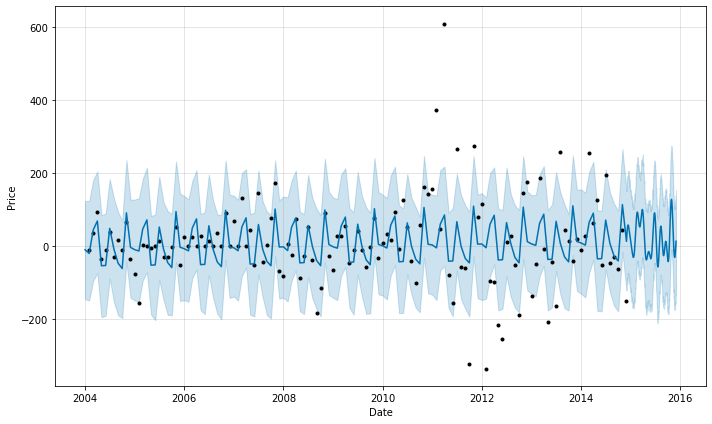

In [126]:
figure=m.plot(forecast,xlabel='Date',ylabel='Price')

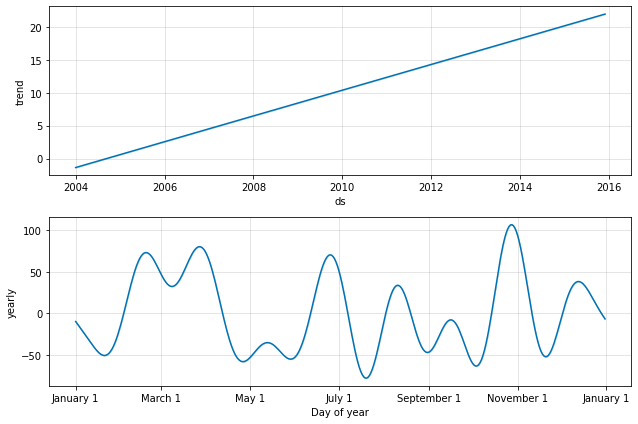

In [127]:
figure2=m.plot_components(forecast)

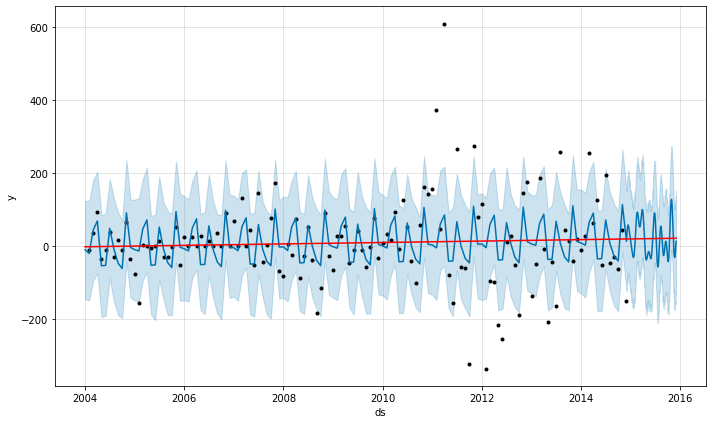

In [128]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)